In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# checking for and dropping duplicates
data['id'].nunique()
data = data.drop_duplicates(subset='id', keep="first")

In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.drop(["id"] , axis = 1, inplace = True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,0.007604,0.235118,3.410384,7.661737,1790.960440,291.744495,1971.098433,84.729800,98077.862288,47.560156,-122.213697,1988.314378,12785.961280
std,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,0.086871,0.767092,0.650235,1.174256,829.026491,442.781983,29.385277,402.431012,53.469371,0.138601,0.140896,685.699093,27375.467469
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2370.000000,10087.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Correlation Matrix

In [9]:
corrm = data.corr()
corrm

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309007,0.525453,0.701993,0.088895,0.256278,0.266961,0.396933,0.035089,0.667496,0.605495,0.323552,0.052967,0.127002,-0.052171,0.306057,0.020571,0.584688,0.082038
bedrooms,0.309007,1.000000,0.516772,0.577512,0.031719,0.175207,-0.006685,0.079542,0.027896,0.358396,0.478441,0.303035,0.153745,0.018435,-0.153621,-0.010228,0.129836,0.393161,0.029117
bathrooms,0.525453,0.516772,1.000000,0.754422,0.087143,0.499863,0.063734,0.186684,-0.127839,0.664727,0.684994,0.283539,0.505092,0.051101,-0.202958,0.023444,0.221935,0.568194,0.086627
sqft_living,0.701993,0.577512,0.754422,1.000000,0.171957,0.352867,0.103902,0.283753,-0.060973,0.762402,0.876683,0.434419,0.316544,0.055084,-0.198621,0.051118,0.239214,0.756205,0.182775
sqft_lot,0.088895,0.031719,0.087143,0.171957,1.000000,-0.005950,0.021571,0.075012,-0.009298,0.112541,0.182581,0.015107,0.052447,0.007636,-0.129411,-0.085992,0.229555,0.143650,0.718097
floors,0.256278,0.175207,0.499863,0.352867,-0.005950,1.000000,0.023473,0.028211,-0.266543,0.457475,0.522648,-0.246066,0.489062,0.005626,-0.058108,0.049279,0.124285,0.278854,-0.011917
waterfront,0.266961,-0.006685,0.063734,0.103902,0.021571,0.023473,1.000000,0.403025,0.016607,0.082841,0.072021,0.080838,-0.026537,0.093025,0.030558,-0.014395,-0.042188,0.086558,0.030694
view,0.396933,0.079542,0.186684,0.283753,0.075012,0.028211,0.403025,1.000000,0.045051,0.249890,0.166930,0.276482,-0.055153,0.103633,0.087096,0.005671,-0.079720,0.279077,0.072867
condition,0.035089,0.027896,-0.127839,-0.060973,-0.009298,-0.266543,0.016607,0.045051,1.000000,-0.148248,-0.160782,0.174463,-0.364947,-0.061136,0.004509,-0.015402,-0.107780,-0.095002,-0.003731
grade,0.667496,0.358396,0.664727,0.762402,0.112541,0.457475,0.082841,0.249890,-0.148248,1.000000,0.756068,0.167032,0.445329,0.014357,-0.182675,0.113332,0.196572,0.712507,0.118313


<function matplotlib.pyplot.show(close=None, block=None)>

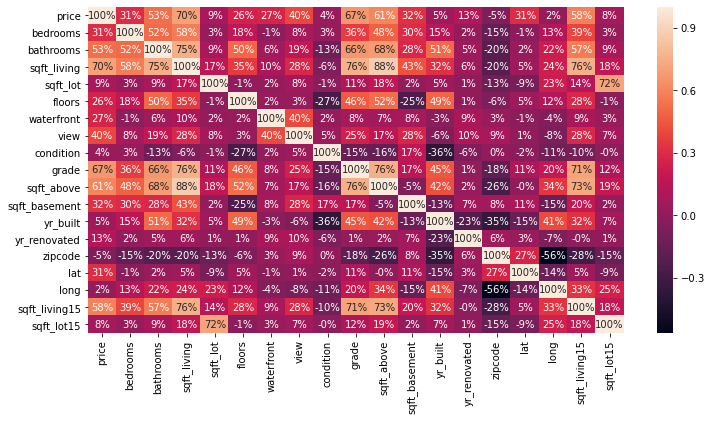

In [11]:
#plot of correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(corrm,annot=True,fmt='.0%')
plt.show

#Inference: sqft_living, sqft_above, grade, bathroom and bedrooms has significantly more correlation with the price than other features 

# Boxplot
## Definitions:
### Median
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

### Inter-quartile range
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

### Upper quartile
Seventy-five percent of the scores fall below the upper quartile.

### Lower quartile
Twenty-five percent of scores fall below the lower quartile.

### Whiskers
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

 

In [9]:
#removing outliers
kc_q1= data.quantile(0.25)
kc_q2= data.quantile(0.75)
kc_iqr=kc_q2-kc_q1
min_outlier=kc_q1-(1.5*kc_iqr)
max_outlier=kc_q2+(1.5*kc_iqr)

In [10]:
#datapoints with true indicates the presence of outliers
print((data < min_outlier) | (data > max_outlier))

       bathrooms  bedrooms  condition   date  floors  grade    lat   long  \
0          False     False      False  False   False  False  False  False   
1          False     False      False  False   False  False  False  False   
2          False     False      False  False   False  False  False  False   
3          False     False      False  False   False  False  False  False   
4          False     False      False  False   False  False  False  False   
...          ...       ...        ...    ...     ...    ...    ...    ...   
21608      False     False      False  False   False  False  False  False   
21609      False     False      False  False   False  False  False  False   
21610      False     False      False  False   False  False  False  False   
21611      False     False      False  False   False  False  False  False   
21612      False     False      False  False   False  False  False  False   

       price  sqft_above  sqft_basement  sqft_living  sqft_living15  sqft_l

In [11]:
#datset after removing rows with outliers
df= data[~((data < (min_outlier))|( data> (max_outlier))).any(axis=1)]

<AxesSubplot:xlabel='floors', ylabel='price'>

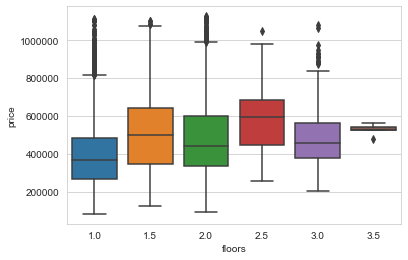

In [12]:
sns.set_style("whitegrid")
plt.ticklabel_format(style='plain')
sns.boxplot(x="floors", y="price", data=df)

### We can see the outliers have been removed and now it can be clearly inferred that houses with 
#### 1) 2.5 floors have the highest median.
#### 2) 2.0 floors shows the greatest variability in prices and also has larger outliers.
#### 3) The notches do not overlap so we can say with 95% confidence that the true medians do differ.
#### 4) The IQR of houses with 1.5 floors is maximum.

## Plotting a histogram for Price  in order to check for normality of distribution for the original data set.

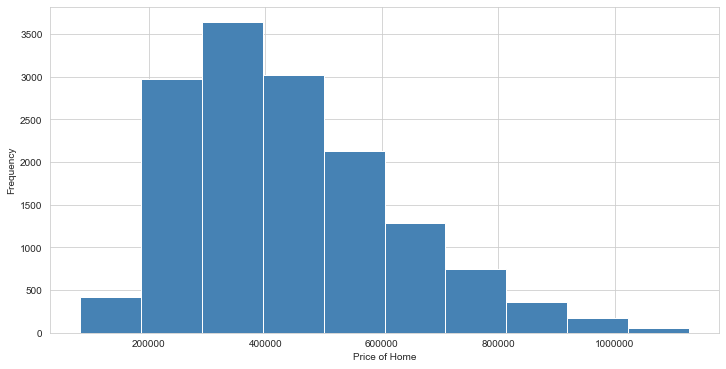

In [17]:
plt.subplots(figsize=(12,6))
plt.hist(df.price,bins=10,color='steelblue')
plt.ticklabel_format(style='plain')
plt.xlabel('Price of Home')
plt.ylabel('Frequency')
plt.show()

### It can be inferred that 
#### 1) The highest frequency (of approx. 3725) of prices is in the range of 300000-400000.
#### 2) The price frequency shows an increasing and then a decreasing trend.
#### 3) The least frequency is of houses priced more than 1000000 which makes sense as not everyone would be able to afford such luxury. Hence, we see a drop in frequency as the prices start increasing beyond 400000.

# Scatter Plot

### Scatter plot can be used to check linearity in the data.

Text(0, 0.5, 'price')

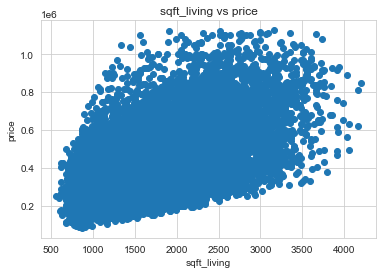

In [37]:
x=df['sqft_living']
y=df['price']

plt.scatter(x,y)
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')

### Inference 
#### There exists a positive relationship between sqft_living and price since there is a positive slope, but it is a weak relationship as the degree of scatter is high.

# Normal Q-Q Plot

In [38]:
import statsmodels.api as sm

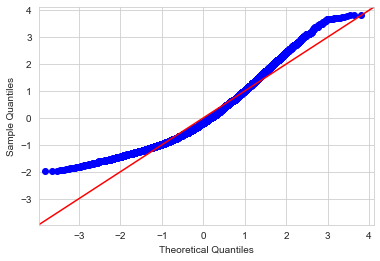

In [40]:
sm.qqplot(df['price'],fit=True,line='45')
plt.show()